# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [44]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [54]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

#print(query_url)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [46]:
url = "https://api.openweathermap.org/data/2.5/weather?"

weather_response = []
a = 0
b = 1


print("Beginning Data Retrieval")  
print("-----------------------------")

for city in cities: 
    query_url = url + "q=" + city + "&appid=" + api_key    
    response = requests.get(query_url).json()
    if response["cod"] == "404":
        print("City not found. Skipping...")
    else:
        weather_response.append(response)
        print(f"Processing Record {a} of Set {b} | {city}")
        a = a+1
        if a == 51:
            b = b+1
            a = 0
            
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------') 
    

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
Processing Record 0 of Set 1 | saint-philippe
Processing Record 1 of Set 1 | atuona
City not found. Skipping...
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | lososina
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | bredasdorp
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | klaksvik
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | clyde river
City not found. Skipping...
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | ponta do sol
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | chapais
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set

Processing Record 31 of Set 4 | mabaruma
Processing Record 32 of Set 4 | bay saint louis
City not found. Skipping...
City not found. Skipping...
Processing Record 33 of Set 4 | kasungu
Processing Record 34 of Set 4 | fort nelson
Processing Record 35 of Set 4 | hanna
Processing Record 36 of Set 4 | okhotsk
Processing Record 37 of Set 4 | nakambala
Processing Record 38 of Set 4 | bud
Processing Record 39 of Set 4 | rio viejo
Processing Record 40 of Set 4 | deputatskiy
Processing Record 41 of Set 4 | batemans bay
Processing Record 42 of Set 4 | kudahuvadhoo
Processing Record 43 of Set 4 | sanmenxia
Processing Record 44 of Set 4 | honiara
Processing Record 45 of Set 4 | valdivia
Processing Record 46 of Set 4 | natitingou
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | kolpny
Processing Record 49 of Set 4 | roebourne
Processing Record 50 of Set 4 | saskylakh
Processing Record 0 of Set 5 | labuhan
City not found. Skipping...
City not found. Skipping...
Processin

Processing Record 11 of Set 8 | tarrafal
Processing Record 12 of Set 8 | norden
Processing Record 13 of Set 8 | stettler
Processing Record 14 of Set 8 | dolny kubin
Processing Record 15 of Set 8 | dukat
Processing Record 16 of Set 8 | henderson
Processing Record 17 of Set 8 | ilebo
Processing Record 18 of Set 8 | hearst
Processing Record 19 of Set 8 | bilibino
Processing Record 20 of Set 8 | fortuna foothills
City not found. Skipping...
Processing Record 21 of Set 8 | bazaliya
Processing Record 22 of Set 8 | vysotsk
Processing Record 23 of Set 8 | kendari
Processing Record 24 of Set 8 | lewistown
Processing Record 25 of Set 8 | kavali
Processing Record 26 of Set 8 | hambantota
Processing Record 27 of Set 8 | ambam
Processing Record 28 of Set 8 | mandalgovi
Processing Record 29 of Set 8 | nagato
Processing Record 30 of Set 8 | santiago
Processing Record 31 of Set 8 | cordoba
Processing Record 32 of Set 8 | strezhevoy
Processing Record 33 of Set 8 | pangnirtung
Processing Record 34 of Se

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

#print(json.dumps(response, indent=4, sort_keys=True))



In [47]:
city_dt = []
cloudy = []
country = []
date = []
humidity = []
lat = []
lng = []
temps = []
winds = []


print("Beginning Data Retrieval")  
print("-----------------------------")

for city in cities: 
    try:
        print(response)
        #time.sleep(3)
        query_url = url + "q=" + city + "&appid=" + api_key
        response = requests.get(query_url).json()
        city_dt.append(response["name"])
        cloudy.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temps.append(response["main"]["temp_max"])
        winds.append(response["wind"]["speed"])

    except KeyError:
        print("City not found. Skipping...")

    #if response["name"] == "404":
        #print("City not found. Skipping...")
      
    #else:
        #weather_response.append(response)
        #print(f"Processing {response['name']}")
            
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------') 

cities_dict = {
            "City"  : city_dt,    
            "Cloudiness" : cloudy, 
            "Country" : country,    
            "Date" : date,       
            "Humidity" : humidity,   
            "Lat" : lat,        
            "Lng" : lng,         
            "Max Temp" : temps,   
            "Wind Speed" : winds    
}

cities_df = pd.DataFrame(cities_dict)

#write datframe to file
cities_df.to_csv("/Users/deankleto/Desktop/python-api-challenge/***WeatherPy***/cities.csv", index = False, header = True)
                   
cities_df.head()

Beginning Data Retrieval
-----------------------------
{'coord': {'lon': -87.28, 'lat': 33.83}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 275.29, 'pressure': 1027, 'humidity': 93, 'temp_min': 273.71, 'temp_max': 276.48}, 'visibility': 16093, 'wind': {'speed': 2.41, 'deg': 333}, 'clouds': {'all': 20}, 'dt': 1572578646, 'sys': {'type': 1, 'id': 4579, 'country': 'US', 'sunrise': 1572523633, 'sunset': 1572562686}, 'timezone': -18000, 'id': 4069659, 'name': 'Jasper', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -73.48, 'lat': 45.36}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 282.39, 'pressure': 993, 'humidity': 93, 'temp_min': 280.37, 'temp_max': 286.48}, 'visibility': 14484, 'wind': {'speed': 5.7, 'deg': 30, 'gust': 9.8}, 'rain': {'1h': 1.52}, 'clouds': {'all': 90}, 'dt

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.9, 'pressure': 992, 'humidity': 70, 'temp_min': 278.71, 'temp_max': 279.15}, 'visibility': 10000, 'wind': {'speed': 8.7, 'deg': 280}, 'clouds': {'all': 75}, 'dt': 1572578487, 'sys': {'type': 1, 'id': 8487, 'country': 'CL', 'sunrise': 1572598853, 'sunset': 1572652406}, 'timezone': -10800, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': -68.31, 'lat': -54.81}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 280.15, 'pressure': 987, 'humidity': 65, 'temp_min': 280.15, 'temp_max': 280.15}, 'visibility': 10000, 'wind': {'speed': 7.7, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1572578407, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1572597897, 'sunset': 1572652114}, 'timezone': -10800, 'id': 3833367, 'nam

{'coord': {'lon': -52.33, 'lat': 4.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 298.15, 'pressure': 1012, 'humidity': 88, 'temp_min': 298.15, 'temp_max': 298.15}, 'visibility': 10000, 'wind': {'speed': 0.5, 'deg': 160}, 'clouds': {'all': 0}, 'dt': 1572578526, 'sys': {'type': 1, 'id': 8669, 'country': 'GF', 'sunrise': 1572599669, 'sunset': 1572642672}, 'timezone': -10800, 'id': 3382160, 'name': 'Cayenne', 'cod': 200}
{'coord': {'lon': 117.63, 'lat': 3.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1009, 'humidity': 74, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1572578526, 'sys': {'type': 1, 'id': 9378, 'country': 'ID', 'sunrise': 1572558776, 'sunset': 1572601985}, 'timezone': 28800, 'id': 1624725, 'name': 'Tarakan',

{'coord': {'lon': 74.49, 'lat': 15.34}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 295.66, 'pressure': 1015, 'humidity': 94, 'temp_min': 295.15, 'temp_max': 296.15}, 'visibility': 8000, 'wind': {'speed': 3.1, 'deg': 140}, 'clouds': {'all': 75}, 'dt': 1572578530, 'sys': {'type': 1, 'id': 9229, 'country': 'IN', 'sunrise': 1572569881, 'sunset': 1572611588}, 'timezone': 19800, 'id': 1273574, 'name': 'Vaini', 'cod': 200}
{'coord': {'lon': -24.5, 'lat': 14.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 300.6, 'pressure': 1013, 'humidity': 53, 'temp_min': 300.6, 'temp_max': 300.6, 'sea_level': 1013, 'grnd_level': 994}, 'wind': {'speed': 5.64, 'deg': 82}, 'clouds': {'all': 0}, 'dt': 1572578531, 'sys': {'country': 'CV', 'sunrise': 1572593615, 'sunset': 1572635367}, 'timezone': -3600, 'id': 3374210, 'name': 'Sao Filipe', 'cod': 200}
{'c

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 262.07, 'pressure': 1009, 'humidity': 67, 'temp_min': 262.07, 'temp_max': 262.07, 'sea_level': 1009, 'grnd_level': 968}, 'wind': {'speed': 3.15, 'deg': 73}, 'clouds': {'all': 100}, 'dt': 1572578534, 'sys': {'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'timezone': -10800, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
{'coord': {'lon': 57.7, 'lat': -20.41}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 297.08, 'pressure': 1016, 'humidity': 73, 'temp_min': 297.04, 'temp_max': 297.15}, 'visibility': 10000, 'wind': {'speed': 2.6, 'deg': 150}, 'clouds': {'all': 20}, 'dt': 1572578534, 'sys': {'type': 1, 'id': 2061, 'country': 'MU', 'sunrise': 1572571639, 'sunset': 1572617889}, 'timezone': 14400, 'id': 934322, 'name': 'Mahebourg', 'cod': 200}
{'coord'

{'coord': {'lon': 170.5, 'lat': -45.87}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.04, 'pressure': 1014, 'humidity': 61, 'temp_min': 287.04, 'temp_max': 287.04}, 'wind': {'speed': 10.28, 'deg': 172, 'gust': 12.07}, 'rain': {}, 'clouds': {'all': 100}, 'dt': 1572578538, 'sys': {'type': 3, 'id': 75281, 'country': 'NZ', 'sunrise': 1572542161, 'sunset': 1572593223}, 'timezone': 46800, 'id': 2191562, 'name': 'Dunedin', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 123.37, 'lat': 66.77}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'model', 'main': {'temp': 258.53, 'pressure': 1015, 'humidity': 93, 'temp_min': 258.53, 'temp_max': 258.53, 'sea_level': 1015, 'grnd_level': 1009}, 'wind': {'speed': 4.64, 'deg': 252}, 'snow': {'3h': 0.31}, 'clouds': {'all': 100}, 'dt': 1572578538, 'sys': {'country': 'RU'

{'coord': {'lon': -0.6, 'lat': 45.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 286.65, 'pressure': 1016, 'humidity': 93, 'temp_min': 286.15, 'temp_max': 287.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1572578542, 'sys': {'type': 1, 'id': 6452, 'country': 'FR', 'sunrise': 1572590482, 'sunset': 1572627029}, 'timezone': 3600, 'id': 3026644, 'name': 'Souillac', 'cod': 200}
{'coord': {'lon': -52.73, 'lat': 47.66}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.87, 'pressure': 1020, 'humidity': 93, 'temp_min': 281.15, 'temp_max': 282.59}, 'visibility': 24140, 'wind': {'speed': 10.3, 'deg': 220, 'gust': 13.9}, 'rain': {}, 'clouds': {'all': 90}, 'dt': 1572578542, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1572603272, 'sunset': 1572639261}, 'timezone': -9000, '

{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 302.28, 'pressure': 1004, 'humidity': 75, 'temp_min': 302.28, 'temp_max': 302.28, 'sea_level': 1004, 'grnd_level': 1004}, 'wind': {'speed': 6.45, 'deg': 80}, 'rain': {'3h': 0.44}, 'clouds': {'all': 100}, 'dt': 1572578545, 'sys': {'country': 'KI', 'sunrise': 1572545523, 'sunset': 1572588762}, 'timezone': 43200, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
{'coord': {'lon': -52.96, 'lat': 5.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 301.26, 'pressure': 1012, 'humidity': 79, 'temp_min': 301.26, 'temp_max': 301.26, 'sea_level': 1012, 'grnd_level': 1011}, 'wind': {'speed': 8.1, 'deg': 85}, 'clouds': {'all': 0}, 'dt': 1572578546, 'sys': {'country': 'GF', 'sunrise': 1572599847, 'sunset': 1572642796}, 'timezone': -10800, 'id': 3380290, 'name': 'Sinnama

{'coord': {'lon': 37.01, 'lat': 39.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 277.15, 'pressure': 1016, 'humidity': 80, 'temp_min': 277.15, 'temp_max': 277.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 120}, 'clouds': {'all': 75}, 'dt': 1572578437, 'sys': {'type': 1, 'id': 6962, 'country': 'TR', 'sunrise': 1572580794, 'sunset': 1572618664}, 'timezone': 10800, 'id': 300617, 'name': 'Sivas', 'cod': 200}
{'coord': {'lon': -53.28, 'lat': 47.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 281.87, 'pressure': 1020, 'humidity': 93, 'temp_min': 281.15, 'temp_max': 282.59}, 'visibility': 24140, 'wind': {'speed': 10.3, 'deg': 220, 'gust': 13.9}, 'clouds': {'all': 90}, 'dt': 1572578550, 'sys': {'type': 1, 'id': 998, 'country': 'CA', 'sunrise': 1572603393, 'sunset': 1572639404}, 'timezone': -9000, 'id': 5895424, '

{'coord': {'lon': -73.36, 'lat': 41.14}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.4, 'pressure': 1003, 'humidity': 88, 'temp_min': 292.04, 'temp_max': 294.82}, 'visibility': 16093, 'wind': {'speed': 13.9, 'deg': 200, 'gust': 19.5}, 'rain': {}, 'clouds': {'all': 90}, 'dt': 1572578282, 'sys': {'type': 1, 'id': 3409, 'country': 'US', 'sunrise': 1572520977, 'sunset': 1572558661}, 'timezone': -14400, 'id': 4845585, 'name': 'Westport', 'cod': 200}
{'coord': {'lon': 67.45, 'lat': 24.14}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 302.35, 'pressure': 1011, 'humidity': 58, 'temp_min': 302.35, 'temp_max': 302.35, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 2.36, 'deg': 25}, 'clouds': {'all': 0}, 'dt': 1572578554, 'sys': {'country': 'PK', 'sunrise': 1572572168, 'sunset': 1572612679}, 'timezone': 18000, 'id': 1174451

{'coord': {'lon': 33.8, 'lat': -3.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 294.07, 'pressure': 1012, 'humidity': 69, 'temp_min': 294.07, 'temp_max': 294.07, 'sea_level': 1012, 'grnd_level': 868}, 'wind': {'speed': 0.93, 'deg': 141}, 'rain': {'3h': 0.56}, 'clouds': {'all': 95}, 'dt': 1572578558, 'sys': {'country': 'TZ', 'sunrise': 1572578499, 'sunset': 1572622500}, 'timezone': 10800, 'id': 151211, 'name': 'Sola', 'cod': 200}
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 283.15, 'pressure': 1009, 'humidity': 100, 'temp_min': 283.15, 'temp_max': 283.15}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1572578558, 'sys': {'type': 1, 'id': 8512, 'country': 'CL', 'sunrise': 1572601162, 'sunset': 1572651465}, 'timezone': -10800, 'id': 3896218, 'name': '

{'coord': {'lon': -70.03, 'lat': 12.52}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 302.15, 'pressure': 1012, 'humidity': 79, 'temp_min': 302.15, 'temp_max': 302.15}, 'visibility': 10000, 'wind': {'speed': 5.7, 'deg': 80}, 'clouds': {'all': 20}, 'dt': 1572578562, 'sys': {'type': 1, 'id': 8791, 'country': 'AW', 'sunrise': 1572517975, 'sunset': 1572560064}, 'timezone': -14400, 'id': 3577154, 'name': 'Oranjestad', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 121.44, 'lat': 17.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'model', 'main': {'temp': 300.79, 'pressure': 1011, 'humidity': 81, 'temp_min': 300.79, 'temp_max': 300.79, 'sea_level': 1011, 'grnd_level': 991}, 'wind': {'speed': 3.37, 'deg': 349}, 'rain': {'3h': 2.5}, 'clouds': {'all': 93}, 'dt': 1572578562, 'sys': {'country': 'PH', 'sunrise': 15

{'coord': {'lon': -73.25, 'lat': -39.81}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 282.82, 'pressure': 1014, 'humidity': 99, 'temp_min': 282.82, 'temp_max': 282.82, 'sea_level': 1014, 'grnd_level': 984}, 'wind': {'speed': 2.26, 'deg': 9}, 'rain': {'3h': 3.25}, 'clouds': {'all': 100}, 'dt': 1572578566, 'sys': {'country': 'CL', 'sunrise': 1572601351, 'sunset': 1572651032}, 'timezone': -10800, 'id': 3868707, 'name': 'Valdivia', 'cod': 200}
{'coord': {'lon': 1.38, 'lat': 10.31}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'model', 'main': {'temp': 295.17, 'pressure': 1011, 'humidity': 78, 'temp_min': 295.17, 'temp_max': 295.17, 'sea_level': 1011, 'grnd_level': 956}, 'wind': {'speed': 1.51, 'deg': 186}, 'clouds': {'all': 43}, 'dt': 1572578566, 'sys': {'country': 'BJ', 'sunrise': 1572587110, 'sunset': 1572629450}, 'timezone': 3600, 'id': 2392601, 'name':

{'coord': {'lon': -81.25, 'lat': 19.28}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 300.02, 'pressure': 1015, 'humidity': 88, 'temp_min': 298.71, 'temp_max': 301.48}, 'visibility': 10000, 'wind': {'speed': 4.75, 'deg': 55}, 'rain': {}, 'clouds': {'all': 20}, 'dt': 1572578570, 'sys': {'type': 1, 'id': 7265, 'country': 'KY', 'sunrise': 1572521103, 'sunset': 1572562322}, 'timezone': -18000, 'id': 3580733, 'name': 'Bodden Town', 'cod': 200}
{'coord': {'lon': 150.48, 'lat': -35.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.23, 'pressure': 1013, 'humidity': 47, 'temp_min': 299.26, 'temp_max': 304.26}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1572578570, 'sys': {'type': 1, 'id': 9594, 'country': 'AU', 'sunrise': 1572548158, 'sunset': 1572596836}, 'timezone': 39600, 'id': 2145554, 'name

{'coord': {'lon': -64.9, 'lat': -14.83}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'model', 'main': {'temp': 300.22, 'pressure': 1008, 'humidity': 63, 'temp_min': 300.22, 'temp_max': 300.22, 'sea_level': 1008, 'grnd_level': 990}, 'wind': {'speed': 1.06, 'deg': 78}, 'rain': {'3h': 0.13}, 'clouds': {'all': 91}, 'dt': 1572578574, 'sys': {'country': 'BO', 'sunrise': 1572515062, 'sunset': 1572560515}, 'timezone': -14400, 'id': 3902377, 'name': 'Trinidad', 'cod': 200}
{'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 302.41, 'pressure': 1005, 'humidity': 69, 'temp_min': 302.41, 'temp_max': 302.41, 'sea_level': 1005, 'grnd_level': 1005}, 'wind': {'speed': 2.61, 'deg': 172}, 'clouds': {'all': 99}, 'dt': 1572578574, 'sys': {'country': 'PG', 'sunrise': 1572551339, 'sunset': 1572595196}, 'timezone': 36000, 'id': 2092164, 'name': 

{'coord': {'lon': -59.52, 'lat': 13.22}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 300.15, 'pressure': 1013, 'humidity': 78, 'temp_min': 300.15, 'temp_max': 300.15}, 'visibility': 10000, 'wind': {'speed': 6.7, 'deg': 100}, 'clouds': {'all': 20}, 'dt': 1572578578, 'sys': {'type': 1, 'id': 8772, 'country': 'BB', 'sunrise': 1572515496, 'sunset': 1572557499}, 'timezone': -14400, 'id': 3374083, 'name': 'Bathsheba', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -120.46, 'lat': 34.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 283.7, 'pressure': 1020, 'humidity': 34, 'temp_min': 280.37, 'temp_max': 287.04}, 'visibility': 16093, 'wind': {'speed': 3.34, 'deg': 5}, 'clouds': {'all': 1}, 'dt': 1572578578, 'sys': {'type': 1, 'id': 4558, 'country': 'US', 'sunrise': 1572531672, 'suns

{'coord': {'lon': 12.15, 'lat': -15.19}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 295.13, 'pressure': 1011, 'humidity': 88, 'temp_min': 295.13, 'temp_max': 295.13, 'sea_level': 1011, 'grnd_level': 1011}, 'wind': {'speed': 4.61, 'deg': 194}, 'clouds': {'all': 58}, 'dt': 1572578581, 'sys': {'country': 'AO', 'sunrise': 1572582928, 'sunset': 1572628463}, 'timezone': 3600, 'id': 3347019, 'name': 'Namibe', 'cod': 200}
{'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 286.53, 'pressure': 1024, 'humidity': 76, 'temp_min': 286.15, 'temp_max': 287.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 170}, 'clouds': {'all': 11}, 'dt': 1572578582, 'sys': {'type': 1, 'id': 7412, 'country': 'SA', 'sunrise': 1572577773, 'sunset': 1572619074}, 'timezone': 10800, 'id': 110690, 'name': 'Faya', 'cod': 200}

{'coord': {'lon': 78.7, 'lat': 67.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 253.49, 'pressure': 1013, 'humidity': 97, 'temp_min': 253.49, 'temp_max': 253.49, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 1.78, 'deg': 169}, 'clouds': {'all': 36}, 'dt': 1572578585, 'sys': {'country': 'RU', 'sunrise': 1572576528, 'sunset': 1572602919}, 'timezone': 18000, 'id': 1489853, 'name': 'Tazovskiy', 'cod': 200}
{'coord': {'lon': 172.64, 'lat': -43.53}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 287.47, 'pressure': 1013, 'humidity': 58, 'temp_min': 287.15, 'temp_max': 287.59}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 200}, 'clouds': {'all': 100}, 'dt': 1572578585, 'sys': {'type': 1, 'id': 7348, 'country': 'NZ', 'sunrise': 1572541953, 'sunset': 1572592404}, 'timezone': 46800, 'id': 2192362, 'name': 'Chri

{'coord': {'lon': -75.55, 'lat': 39.75}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.38, 'pressure': 999, 'humidity': 88, 'temp_min': 288.15, 'temp_max': 297.59}, 'visibility': 8047, 'wind': {'speed': 4.1, 'deg': 170, 'gust': 11.8}, 'rain': {'1h': 5.29}, 'clouds': {'all': 90}, 'dt': 1572578493, 'sys': {'type': 1, 'id': 5209, 'country': 'US', 'sunrise': 1572521361, 'sunset': 1572559328}, 'timezone': -14400, 'id': 4145381, 'name': 'Wilmington', 'cod': 200}
{'coord': {'lon': -1.35, 'lat': 60.4}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 281.72, 'pressure': 1008, 'humidity': 87, 'temp_min': 281.15, 'temp_max': 282.15}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 160}, 'rain': {'3h': 0.31}, 'clouds': {'all': 100}, 'dt': 1572578589, 'sys': {'type': 1, 'id': 1447, 'country': 'GB', 'sunrise': 1572593290, 'sunset': 1

{'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 274.97, 'pressure': 997, 'humidity': 83, 'temp_min': 274.82, 'temp_max': 275.15}, 'wind': {'speed': 3.1, 'deg': 90}, 'clouds': {'all': 100}, 'dt': 1572578592, 'sys': {'type': 1, 'id': 86, 'country': 'GL', 'sunrise': 1572606555, 'sunset': 1572635503}, 'timezone': -10800, 'id': 3421319, 'name': 'Nuuk', 'cod': 200}
{'coord': {'lon': -51.81, 'lat': -30.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 290.98, 'pressure': 1020, 'humidity': 77, 'temp_min': 290.98, 'temp_max': 290.98, 'sea_level': 1020, 'grnd_level': 1015}, 'wind': {'speed': 4.25, 'deg': 100}, 'clouds': {'all': 100}, 'dt': 1572578592, 'sys': {'country': 'BR', 'sunrise': 1572597089, 'sunset': 1572645003}, 'timezone': -10800, 'id': 3468014, 'name': 'Camaqua', 'cod': 200}
{'coord'

City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 25.39, 'lat': 49.06}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 271.51, 'pressure': 1025, 'humidity': 92, 'temp_min': 267.15, 'temp_max': 272.59}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 210}, 'clouds': {'all': 73}, 'dt': 1572578596, 'sys': {'type': 1, 'id': 8906, 'country': 'UA', 'sunrise': 1572584696, 'sunset': 1572620340}, 'timezone': 7200, 'id': 711348, 'name': 'Buchach', 'cod': 200}
{'coord': {'lon': 90.42, 'lat': 56.01}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 276.41, 'pressure': 1012, 'humidity': 90, 'temp_min': 276.41, 'temp_max': 276.41, 'sea_level': 1012, 'grnd_level': 977}, 'wind': {'speed': 4.2, 'deg': 133}, 'clouds': {'all': 100}, 'dt'

{'coord': {'lon': 72.64, 'lat': 10.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.15, 'pressure': 1010, 'humidity': 74, 'temp_min': 302.15, 'temp_max': 302.15}, 'visibility': 6000, 'wind': {'speed': 3.1, 'deg': 200}, 'clouds': {'all': 40}, 'dt': 1572578601, 'sys': {'type': 1, 'id': 9701, 'country': 'IN', 'sunrise': 1572570022, 'sunset': 1572612335}, 'timezone': 19800, 'id': 1267390, 'name': 'Kavaratti', 'cod': 200}
{'coord': {'lon': 26.69, 'lat': 13.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 298.07, 'pressure': 1012, 'humidity': 25, 'temp_min': 298.07, 'temp_max': 298.07, 'sea_level': 1012, 'grnd_level': 938}, 'wind': {'speed': 5.21, 'deg': 19}, 'clouds': {'all': 0}, 'dt': 1572578601, 'sys': {'country': 'SD', 'sunrise': 1572581243, 'sunset': 1572623169}, 'timezone': 7200, 'id': 364933, 'name': 'Umm Kaddadah', 'cod'

{'coord': {'lon': 101.31, 'lat': 1.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 303.31, 'pressure': 1011, 'humidity': 63, 'temp_min': 303.31, 'temp_max': 303.31, 'sea_level': 1011, 'grnd_level': 1008}, 'wind': {'speed': 1.69, 'deg': 281}, 'clouds': {'all': 59}, 'dt': 1572578605, 'sys': {'country': 'ID', 'sunrise': 1572562559, 'sunset': 1572606035}, 'timezone': 25200, 'id': 1650600, 'name': 'Balaipungut', 'cod': 200}
{'coord': {'lon': 63.05, 'lat': 26}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'model', 'main': {'temp': 298.38, 'pressure': 1013, 'humidity': 67, 'temp_min': 298.38, 'temp_max': 298.38, 'sea_level': 1013, 'grnd_level': 986}, 'wind': {'speed': 0.1, 'deg': 149}, 'clouds': {'all': 0}, 'dt': 1572578605, 'sys': {'country': 'PK', 'sunrise': 1572573361, 'sunset': 1572613599}, 'timezone': 18000, 'id': 1163054, 'name': 'Turbat', 'cod': 200}
{'coor

{'coord': {'lon': -90.15, 'lat': 40.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 269.06, 'pressure': 1024, 'humidity': 86, 'temp_min': 267.15, 'temp_max': 272.04}, 'visibility': 16093, 'wind': {'speed': 3.1, 'deg': 220}, 'clouds': {'all': 1}, 'dt': 1572578608, 'sys': {'type': 1, 'id': 4508, 'country': 'US', 'sunrise': 1572524933, 'sunset': 1572562764}, 'timezone': -18000, 'id': 4899665, 'name': 'Lewistown', 'cod': 200}
{'coord': {'lon': 79.99, 'lat': 14.91}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 299.94, 'pressure': 1013, 'humidity': 79, 'temp_min': 299.94, 'temp_max': 299.94, 'sea_level': 1013, 'grnd_level': 1011}, 'wind': {'speed': 1.33, 'deg': 296}, 'clouds': {'all': 84}, 'dt': 1572578609, 'sys': {'country': 'IN', 'sunrise': 1572568532, 'sunset': 1572610296}, 'timezone': 19800, 'id': 1267394, 'name': 'Kavali', 'cod':

{'coord': {'lon': -41.05, 'lat': -21.64}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 296.81, 'pressure': 1014, 'humidity': 92, 'temp_min': 296.81, 'temp_max': 296.81, 'sea_level': 1014, 'grnd_level': 1013}, 'wind': {'speed': 5.04, 'deg': 37}, 'clouds': {'all': 64}, 'dt': 1572578612, 'sys': {'country': 'BR', 'sunrise': 1572595240, 'sunset': 1572641686}, 'timezone': -10800, 'id': 3448903, 'name': 'Sao Joao da Barra', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -97.07, 'lat': 15.86}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 299.15, 'pressure': 1014, 'humidity': 74, 'temp_min': 299.15, 'temp_max': 299.15}, 'visibility': 9656, 'wind': {'speed': 1.5, 'deg': 10}, 'clouds': {'all': 40}, 'dt': 1572578613, 'sys': {'type': 1, 'id': 7157, 'country': 'MX', 'sunrise': 15725

{'coord': {'lon': 93.63, 'lat': 27.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 299.15, 'pressure': 1014, 'humidity': 69, 'temp_min': 299.15, 'temp_max': 299.15}, 'visibility': 8000, 'wind': {'speed': 1, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1572578616, 'sys': {'type': 1, 'id': 9123, 'country': 'IN', 'sunrise': 1572566100, 'sunset': 1572606181}, 'timezone': 19800, 'id': 1269655, 'name': 'Itanagar', 'cod': 200}
{'coord': {'lon': 81.23, 'lat': 8.58}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 301.91, 'pressure': 1012, 'humidity': 65, 'temp_min': 301.91, 'temp_max': 301.91, 'sea_level': 1012, 'grnd_level': 1003}, 'wind': {'speed': 0.7, 'deg': 336}, 'clouds': {'all': 27}, 'dt': 1572578616, 'sys': {'country': 'LK', 'sunrise': 1572567836, 'sunset': 1572610397}, 'timezone': 19800, 'id': 1226260, 'name': 'Trincomalee', 'cod'

{'coord': {'lon': 131.17, 'lat': 62.67}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 264.08, 'pressure': 1018, 'humidity': 86, 'temp_min': 264.08, 'temp_max': 264.08, 'sea_level': 1018, 'grnd_level': 997}, 'wind': {'speed': 2.36, 'deg': 264}, 'clouds': {'all': 100}, 'dt': 1572578620, 'sys': {'country': 'RU', 'sunrise': 1572562068, 'sunset': 1572592194}, 'timezone': 32400, 'id': 2026160, 'name': 'Borogontsy', 'cod': 200}
{'coord': {'lon': 136.61, 'lat': 45.05}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'model', 'main': {'temp': 278.24, 'pressure': 1011, 'humidity': 55, 'temp_min': 278.24, 'temp_max': 278.24, 'sea_level': 1011, 'grnd_level': 978}, 'wind': {'speed': 4.53, 'deg': 303}, 'clouds': {'all': 35}, 'dt': 1572578620, 'sys': {'country': 'RU', 'sunrise': 1572557453, 'sunset': 1572594198}, 'timezone': 36000, 'id': 2015352, 'name': 'Terney', 'c

{'coord': {'lon': -4.53, 'lat': 42.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.51, 'pressure': 1022, 'humidity': 93, 'temp_min': 287.04, 'temp_max': 289.26}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1572578623, 'sys': {'type': 1, 'id': 6437, 'country': 'ES', 'sunrise': 1572591010, 'sunset': 1572628388}, 'timezone': 3600, 'id': 3114531, 'name': 'Palencia', 'cod': 200}
{'coord': {'lon': 102.58, 'lat': 17.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 299.6, 'pressure': 1013, 'humidity': 65, 'temp_min': 299.15, 'temp_max': 300.15}, 'visibility': 8000, 'wind': {'speed': 2.1, 'deg': 360}, 'clouds': {'all': 75}, 'dt': 1572578552, 'sys': {'type': 1, 'id': 9203, 'country': 'TH', 'sunrise': 1572563301, 'sunset': 1572604684}, 'timezone': 25200, 'id': 1605677, 'name': 'Tha Bo'

{'coord': {'lon': -98.86, 'lat': 38.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 272.81, 'pressure': 1021, 'humidity': 54, 'temp_min': 270.93, 'temp_max': 274.82}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 210}, 'clouds': {'all': 1}, 'dt': 1572578627, 'sys': {'type': 1, 'id': 5716, 'country': 'US', 'sunrise': 1572526876, 'sunset': 1572565001}, 'timezone': -18000, 'id': 4278471, 'name': 'Russell', 'cod': 200}
City not found. Skipping...
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 115.71, 'lat': 36.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 293.73, 'pressure': 1025, 'humidity': 26, 'temp_min': 293.73, 'temp_max': 293.73, 'sea_level': 1025, 'grnd_level': 1021}, 'wind': {'speed': 3.46, 'deg': 70}, 'clouds': {'all': 100}, 'dt': 1572578628, 'sys': {'country': 'CN', 'sunrise': 1572561610, 'sunset':

{'coord': {'lon': 111.97, 'lat': 43.65}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'model', 'main': {'temp': 283.51, 'pressure': 1022, 'humidity': 37, 'temp_min': 283.51, 'temp_max': 283.51, 'sea_level': 1022, 'grnd_level': 911}, 'wind': {'speed': 1.89, 'deg': 178}, 'clouds': {'all': 97}, 'dt': 1572578631, 'sys': {'country': 'CN', 'sunrise': 1572563208, 'sunset': 1572600270}, 'timezone': 28800, 'id': 2037485, 'name': 'Erenhot', 'cod': 200}
{'coord': {'lon': -3.53, 'lat': 18.9}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 295.97, 'pressure': 1014, 'humidity': 22, 'temp_min': 295.97, 'temp_max': 295.97, 'sea_level': 1014, 'grnd_level': 982}, 'wind': {'speed': 5.09, 'deg': 19}, 'clouds': {'all': 0}, 'dt': 1572578631, 'sys': {'country': 'ML', 'sunrise': 1572588845, 'sunset': 1572630072}, 'timezone': 0, 'id': 2460954, 'name': 'Araouane', 'cod': 200}
{'coord'

{'coord': {'lon': 39.51, 'lat': 68.05}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'model', 'main': {'temp': 259.24, 'pressure': 1010, 'humidity': 81, 'temp_min': 259.24, 'temp_max': 259.24, 'sea_level': 1010, 'grnd_level': 992}, 'wind': {'speed': 1.82, 'deg': 229}, 'clouds': {'all': 5}, 'dt': 1572578634, 'sys': {'country': 'RU', 'sunrise': 1572586249, 'sunset': 1572612010}, 'timezone': 10800, 'id': 556268, 'name': 'Ostrovnoy', 'cod': 200}
{'coord': {'lon': 16.37, 'lat': 68.1}, 'weather': [{'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 272.61, 'pressure': 1009, 'humidity': 92, 'temp_min': 269.15, 'temp_max': 275.37}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 250}, 'snow': {'3h': 2.94}, 'clouds': {'all': 100}, 'dt': 1572578525, 'sys': {'type': 1, 'id': 1614, 'country': 'NO', 'sunrise': 1572591844, 'sunset': 1572617521}, 'timezone': 3600, 'id': 3150002, 'name': 'Kjopsvik'

{'coord': {'lon': 141.45, 'lat': -31.97}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1008, 'humidity': 23, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 9.8, 'deg': 10}, 'clouds': {'all': 87}, 'dt': 1572578638, 'sys': {'type': 1, 'id': 9491, 'country': 'AU', 'sunrise': 1572550636, 'sunset': 1572598692}, 'timezone': 37800, 'id': 2173911, 'name': 'Broken Hill', 'cod': 200}
{'coord': {'lon': -44.73, 'lat': -17.6}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'model', 'main': {'temp': 296.71, 'pressure': 1013, 'humidity': 62, 'temp_min': 296.71, 'temp_max': 296.71, 'sea_level': 1013, 'grnd_level': 925}, 'wind': {'speed': 4.8, 'deg': 85}, 'clouds': {'all': 94}, 'dt': 1572578639, 'sys': {'country': 'BR', 'sunrise': 1572596411, 'sunset': 1572642282}, 'timezone': -10800, 'id': 3445459, 'name': 'Varze

{'coord': {'lon': 25.84, 'lat': 58.21}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 275.27, 'pressure': 1013, 'humidity': 93, 'temp_min': 275.15, 'temp_max': 275.37}, 'visibility': 10000, 'wind': {'speed': 4.1, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1572578642, 'sys': {'type': 1, 'id': 1335, 'country': 'EE', 'sunrise': 1572586218, 'sunset': 1572618602}, 'timezone': 7200, 'id': 589922, 'name': 'Kuressaare', 'cod': 200}
{'coord': {'lon': -128.61, 'lat': 54.52}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 278.15, 'pressure': 1030, 'humidity': 93, 'temp_min': 278.15, 'temp_max': 278.15}, 'visibility': 32186, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1572578642, 'sys': {'type': 1, 'id': 984, 'country': 'CA', 'sunrise': 1572536065, 'sunset': 1572570092}, 'timezone': -25200, 'id': 6162949, 'name': 'Terrace', 'cod'

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,90,CA,1572578519,93,45.36,-73.48,286.48,5.70
1,Atuona,45,PF,1572578519,69,-9.80,-139.03,300.04,4.67
2,Avarua,16,CK,1572578751,78,-21.21,-159.78,299.15,3.10
3,Lososina,7,RU,1572578751,64,49.00,140.31,280.54,7.91
4,Busselton,79,AU,1572578520,80,-33.64,115.35,287.04,3.13


In [48]:
cities_df = pd.DataFrame(cities_dict)

#write datframe to file
cities_df.to_csv("/Users/deankleto/Desktop/python-api-challenge/***WeatherPy***/cities.csv", index = False, header = True)
                   
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saint-Philippe,90,CA,1572578519,93,45.36,-73.48,286.48,5.70
1,Atuona,45,PF,1572578519,69,-9.80,-139.03,300.04,4.67
2,Avarua,16,CK,1572578751,78,-21.21,-159.78,299.15,3.10
3,Lososina,7,RU,1572578751,64,49.00,140.31,280.54,7.91
4,Busselton,79,AU,1572578520,80,-33.64,115.35,287.04,3.13


In [49]:
cities

['saleaula',
 'saint-philippe',
 'atuona',
 'warqla',
 'avarua',
 'lososina',
 'busselton',
 'bredasdorp',
 'khatanga',
 'chokurdakh',
 'klaksvik',
 'jamestown',
 'kruisfontein',
 'tuktoyaktuk',
 'kapaa',
 'clyde river',
 'bairiki',
 'luderitz',
 'ponta do sol',
 'punta arenas',
 'ushuaia',
 'chapais',
 'port alfred',
 'barcelona',
 'airai',
 'salalah',
 'illoqqortoormiut',
 'dikson',
 'taolanaro',
 'saint-augustin',
 'ahuimanu',
 'georgetown',
 'bluff',
 'taunsa',
 'meadow lake',
 'cape town',
 'rikitea',
 'cayenne',
 'tarakan',
 'pevek',
 'kloulklubed',
 'safaga',
 'eenhana',
 'toyooka',
 'hobart',
 'nome',
 'new norfolk',
 'gazanjyk',
 'albany',
 'lata',
 'carlsbad',
 'college',
 'faanui',
 'arraial do cabo',
 'aklavik',
 'vaini',
 'sao filipe',
 'bambous virieux',
 'marawi',
 'sitka',
 'tiksi',
 'isangel',
 'pisco',
 'komsomolskiy',
 'victoria',
 'alofi',
 'eureka',
 'portland',
 'laguna',
 'hilo',
 'abonnema',
 'iqaluit',
 'qaanaaq',
 'mahebourg',
 'zemio',
 'quatre cocos',
 'gene

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

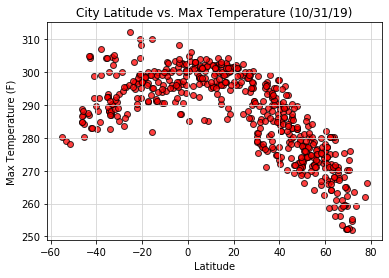

In [59]:
plt.scatter(lat,temps, marker ="o", facecolors = "red", edgecolors = "black",alpha = 0.75)

plt.title("City Latitude vs. Max Temperature (10/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

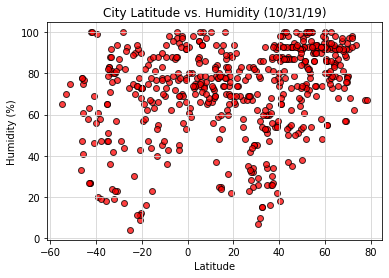

In [60]:
plt.scatter(lat,humidity, marker ="o", facecolors = "red", edgecolors = "black",alpha = 0.75)

plt.title("City Latitude vs. Humidity (10/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

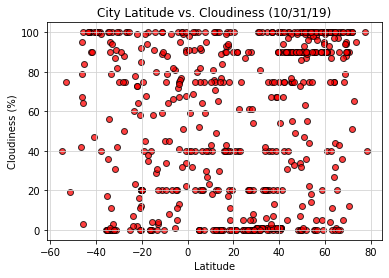

In [61]:
plt.scatter(lat,cloudy, marker ="o", facecolors = "red", edgecolors = "black",alpha = 0.75)

plt.title("City Latitude vs. Cloudiness (10/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

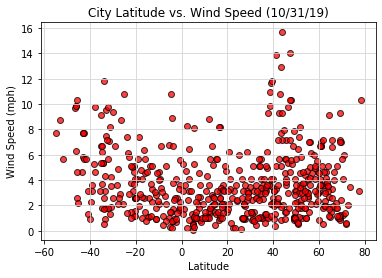

In [62]:
plt.scatter(lat,winds, marker ="o", facecolors = "red", edgecolors = "black",alpha = 0.75)

plt.title("City Latitude vs. Wind Speed (10/31/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude_vs_Wind.png")
plt.show()